# Decoradores

## Metaprogramação

Metaprogramação é uma técnica no qual programas de computador tem a habilidade de tratar outros programas como *input*. Isso significa que o programa pode ser desenhado para ler, gerar, analisar ou transformar outros programas.

Decoradores tem a habilidade de adicionar novas funcionalidades a funções. Portanto, ajuda programadores a minimizar o número de linhas do código (código limpo) e diminui o tempo de desenvolvimento.

## Tudo é objeto!

Python é uma linguagem orientada a objeto e em Python tudo é um objeto. Variáveis não possuem nenhuma informação atrelada e são simplesmente referências (ponteiros).

In [ ]:
x = 42
print('x = 42 ->', type(x))

x = 'olá mundo!'
print('x = \'olá mundo!\' ->', type(x))

x = [ 3.14159, 2.71828 ]
print('x = [ 3.14159, 2.71828 ] ->', type(x))

x = 42 -> <class 'int'>
x = 'olá mundo!' -> <class 'str'>
x = [ 3.14159, 2.71828 ] -> <class 'list'>


Os tipos não estão relacionados ao nome da variável, mas aos objetos propriamente ditos.

Objetos são entidades que contém dados associados com metadados e/ou funcionalidades. Em Python tudo é um objeto, isso significa que toda entidade tem alguns metadados (atributos) e funcionalidades (métodos) associados. Classes (estudadas nas últimas aulas) são a forma mais primitiva de se criar um objeto.

A função *built-in* **dir** permite ler todos os atributos e métodos associados a qualquer objeto.


In [ ]:
x = 1
attrs_methods = dir(x)
print(attrs_methods)

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


In [ ]:
class Ponto:
    """ Cria um novo Ponto, com coordenadas x, y """

    def __init__(self, x=0, y=0):
        """ Inicializa em x, y o novo ponto criado pela classe """
        self.x = x
        self.y = y

    def distancia_da_origem(self):
        """ Calcula minha distânica da origem """
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5
    
    def ponto_medio(self, alvo):
        """ Retorna o ponto medio entre esse ponto e o alvo """
        mx = (self.x + alvo.x)/2
        my = (self.y + alvo.y)/2
        return Ponto(mx, my)
    
    def __str__(self):
        return "({0}, {1})".format(self.x, self.y)


x = Ponto()
attrs_methods = dir(x)
print(attrs_methods)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'distancia_da_origem', 'ponto_medio', 'x', 'y']


## Se tudo é um objeto, logo, funções também são objetos!

Isso significa que podemos utilizar funções como argumentos e até retornar funçãos a partir de outra funções.

In [ ]:
def minha_funcao():
    print("Olá, mundo!")

minha_nova_funcao = minha_funcao
minha_nova_funcao()

Olá, mundo!


Quando chamamos os métodos **minha_funcao** e **minha_nova_funcao**, elas produzem o mesmo resultado. Isso é porque elas se referem ao mesmo objeto.

## Decoradores

Um decorador pega uma função, extende sua funcionalidade e retorna.

In [ ]:
def funcao_ext(func):
    def funcao_envelopada():
        print("Olá")
        func()
    return funcao_envelopada

def nome():
    print("Hamlet")

obj = funcao_ext(nome)
obj()

Olá
Hamlet


No exemplo acima, **funcao_ext** é um decorador e a função **nome** está sendo decorada.

## Sintaxe

Decorar funções é uma técnica comum e sua utilização pode ser simplificada através do símbolo **@**. Apesar de fazerem a mesma coisa, o código fica mais limpo.

In [ ]:
@funcao_ext
def nome():
    print("Hamlet")

nome()

Olá
Hamlet


## Parâmetros

Funções que serão decoradas também podem ter parâmetros.

In [ ]:
def pprint(func):
    def wrapped(x,y):
        res = func(x,y)
        print(f'O resultado de x vezes y é:', res)
        return res
    return wrapped

@pprint
def mult(x,y):
    return x*y

z = mult(3,3)

O resultado de x vezes y é: 9


## Exercícios

1. Escreva um decorador que mede o tempo de execução de uma função.

[2.91232049 2.05801616 3.30979014 1.5292149 ]


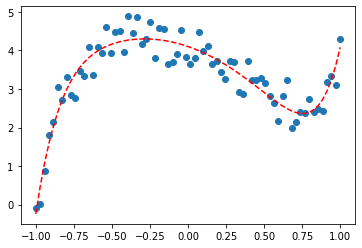

A função fit_and_plot executou em 0.23594880104064941 segundos.


In [ ]:
import time

import numpy as np
import scipy.optimize as sciop
import matplotlib.pyplot as plt

def timeit(func):
    def wrapper(*arg, **kw):
        t1 = time.time()
        res = func(*arg, **kw)
        t2 = time.time()
        print(f'A função {func.__name__} executou em {(t2 - t1)} segundos.')
        return res
    return wrapper

def objective(x, a, b, c, d):
	return a*np.sin(b + x) + c * x**7 - x**2 + d

@timeit
def fit_and_plot():
    N = 70
    x = np.linspace(-1,1,N)
    y = objective(x, 3,2,3,0.8) + 1.3*np.random.random(N)


    popt, _ = sciop.curve_fit(objective, x, y)
    a, b, c, d = popt

    print(popt)

    y_line = objective(x, a, b, c, d)

    plt.scatter(x, y)
    plt.plot(x, y_line, '--', color='red')
    plt.show()

fit_and_plot()

2. Escreva um decorador que recebe um argumento booleano, caso seja verdadeiro irá imprimir o resultado da função decorada, do contrário irá apenas executá-la.

[2.23628554 2.05383867 2.64441311 1.36560513]


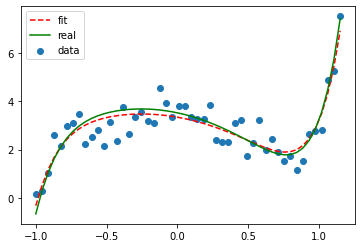

In [ ]:
import time

import numpy as np
import scipy.optimize as sciop
import matplotlib.pyplot as plt

def timeit(flag):
    def decorator(func):
        def wrapper(*arg, **kw):
            t1 = time.time()
            res = func(*arg, **kw)
            t2 = time.time()
            if flag is True:
                print(f'A função {func.__name__} executou em {(t2 - t1)} segundos.')
            return res
        return wrapper
    return decorator

def objective(x, a, b, c, d):
	return a*np.sin(b + x) + c * x**7 - x**2 + d

@timeit(False)
def fit_and_plot():
    N = 50
    x = np.linspace(-1,1.15,N)
    y = objective(x, 3,2,3,0.8) + 1.6*(np.random.random(N)-np.random.random(N))


    popt, _ = sciop.curve_fit(objective, x, y)
    a, b, c, d = popt

    print(popt)

    y_line = objective(x, a, b, c, d)
    y_real = objective(x, 3,2,3,0.8)

    plt.scatter(x, y, label='data')
    plt.plot(x, y_line, '--', color='red', label='fit')
    plt.plot(x, y_real, '-', color='green', label='real')
    plt.legend()
    plt.show()

fit_and_plot()

# Compilação just-in-time (JIT)

Quando executamos um programa de computador, eles são interpretados ou compilados. Uma linguagem de programação é apenas um conjunto de heurísticas, por outro lado, os compiladores/interpretadores são sua implementação. Naturalmente, uma linguagem pode ter múltiplas implementações.

Dizemos que o Python é uma linguagem interpretada, mas, quando dizemos isso estamos nos referindo a implementação padrão do Python. Python é uma linguagem e o CPython é o interpretador e implementação do Python.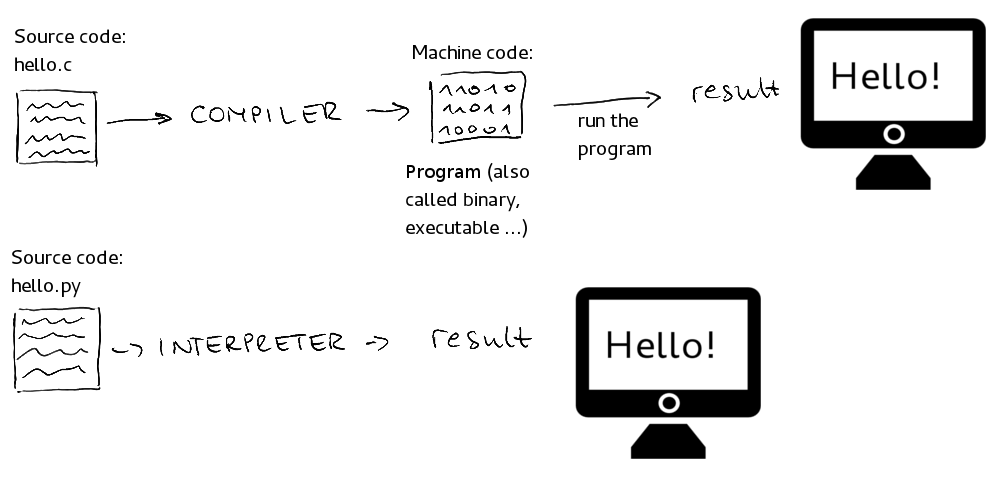



*   Um interpretador é um programa que executa o código diretamente.
*   Um compilador é um programa que traduz o código de uma linguagem para outra linguagem (em geral código de máquina).

Compiladores funcionam em dois passos distintos, primeiro o código é traduzido para um arquivo que contém código de máquina (é entendido nativamente pelo computador), depois o código é executado.

Contudo, a tradução de linguagem para linguagem não é sempre para código de máquina. Os compiladores tem a capacidade de traduzir para qualquer linguagem alvo, até mesmo linguagens com o mesmo tipo de abstração (chamamos esse processo de transpilação), o que abre possibilidades para compiladores mais sofisticados.

Java é uma linguagem de programação compilada, cujo compilador é implementado em dois passos. Primeiro o código Java é compilado para *bytecode* (representação intermediária), depois o *bytecode* é compilado just-in-time.

Python funciona de maneira parecida em sua implementação padrão (CPython), primeiro o código é compilado para *bytecode* e depois o *bytecode* é interpretado por uma máquina virtual. É durante a interpretação do *bytecode* que verificações de sintaxe são feitas.



## Então, o que é JIT?

Um compilador JIT não compila o código *Ahead-Of-Time* (AOT), mas ainda assim compila o código para código de máquina diferente de um interpretador. A compilação acontece em *runtime* (tempo de execução), enquanto o programa está executando e isso fornece flexibilidade para linguagens dinamicamente tipadas, matendo a velocidade do código de máquina obtido.

* Linguagem dinamicamente tipada: Se o tipo é associada com valores durante o tempo de execução (*runtime*), verificações de tipagem são feitas durante a execução. Exemplos: Python, R, Julia.

* Linguagem estaticamente tipada: Se o tipo de uma variável é conhecido durante a compilação, portanto, verificações de tipagem são feitas durante a compilação. Exemplos: Java, C, C++.

Em termos de velocidade, a grande diferença de um compilador JIT é o código de máquina otimizado que ele produz (específico para cada computador), diferente do interpretador, o *bytecode* produzido pela transpilação não é otimizada para o *hardware* em uso, sua vantagem é a fácil interpretação pela máquina virtual.

## Usando JIT com Numba

[Numba](https://numba.pydata.org/numba-doc/latest/index.html) oferece compilação JIT para o Python padrão. Através do decorador **@nb.jit** ele toma funções escritas em Python e as transforma para uma representação intermediária do compilador [LLVM](https://llvm.org/) (compilador desenvolvido para otimizar em tempos de compilação, ligação e execução de programas escritos em linguagens de programação variadas), depois transpila para um *bytecode* otimizado para arquitetura de computador utilizada. Apesar de ser possível fazer esse papel manualmente utilizando o Cython, o Numba é tão fácil quanto utilizar um decorador enquanto no Cython todo código deve ser refeito.

Para ilustrar o uso do compilador JIT e a velocidade que ele proporciona, vamos implementar um algoritmo de multiplicação matricial.

$ M_{ij} = \sum_{k=1}^{m} A_{ij} B_{ij} $

### **Python** 

In [ ]:
import numpy as np

def mm_py(A,B):
    m, n = A.shape
    p = B.shape[1]

    C = np.zeros((m,p))

    for i in range(0,m):
        for j in range(0,p):
            for k in range(0,n):
                C[i,j] += A[i,k]*B[k,j] 
    return C

### **Numpy**

In [ ]:
import numpy as np

def mm_np(A,B):
    return np.dot(A,B)

### **Numba**

In [ ]:
import numpy as np
import numba as nb

@nb.jit()
def mm_nb(A,B):
    m, n = A.shape
    p = B.shape[1]

    C = np.zeros((m,p))

    for i in range(0,m):
        for j in range(0,p):
            for k in range(0,n):
                C[i,j] += A[i,k]*B[k,j] 
    return C

### Benchmark

Utilizando o módulo **timeit** para medir o tempo de execução, fixando os parâmetros $ A_{ij} \rightarrow i=j=10 $ e variando os parâmetros $ B_{il} \rightarrow 10^n \forall n [0, 7] $, temos:

In [ ]:
import timeit
from statistics import median, mean

llist = [10**n for n in range(8)]
median_dict_py = {}
median_dict_np = {}
median_dict_nb = {}

for l in llist:

    ############## Python

    SETUP_PY = '''
from __main__ import mm_py
import numpy as np'''

    CODE_PY = f'''
i = j = 10
l = {l}
A = np.random.rand(i,j)
B = np.random.rand(i,l)
mm_py(A,B)'''

    times_py = timeit.repeat(
        setup=SETUP_PY,
        stmt=CODE_PY,
        repeat=2,
        number=10
    )

    median_dict_py[l] = median(times_py)

    ############### Numpy

    SETUP_NP = '''
from __main__ import mm_np
import numpy as np'''

    CODE_NP = f'''
i = j = 10
l = {l}
A = np.random.rand(i,j)
B = np.random.rand(i,l)
mm_np(A,B)'''

    times_np = timeit.repeat(
        setup=SETUP_NP,
        stmt=CODE_NP,
        repeat=2,
        number=10
    )

    median_dict_np[l] = median(times_np)

    ############### Numba

    SETUP_NB = '''
from __main__ import mm_nb
import numpy as np
import numba as nb'''

    CODE_NB = f'''
i = j = 10
l = {l}
A = np.random.rand(i,j)
B = np.random.rand(i,l)
mm_nb(A,B)'''

    times_nb = timeit.repeat(
        setup=SETUP_NB,
        stmt=CODE_NB,
        repeat=2,
        number=10
    )

    median_dict_nb[l] = median(times_nb)


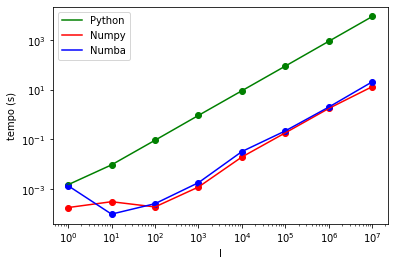

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(median_dict_py.keys()), list(median_dict_py.values()), label='Python', color='g')
plt.plot(list(median_dict_np.keys()), list(median_dict_np.values()), label='Numpy', color='r')
plt.plot(list(median_dict_nb.keys()), list(median_dict_nb.values()), label='Numba', color='b')
plt.scatter(list(median_dict_py.keys()), list(median_dict_py.values()), color='g')
plt.scatter(list(median_dict_np.keys()), list(median_dict_np.values()), color='r')
plt.scatter(list(median_dict_nb.keys()), list(median_dict_nb.values()), color='b')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('l')
plt.ylabel('tempo (s)')
plt.legend()
plt.show()

O lado negativo é que o Numba suporta apenas um conjunto restrito de instruções do Python, mas tem um bom suporte para funções do Numpy.


*   O Numba não suporta *context handlers* (expressões com *with*), nem *exception handling* (*try*, *except*, *finally*).
*   Se o código não é suportado pelo Numba, quando utilizado o *object mode* (é utilizado por padrão) o código é gerado normalmente sem uso do compilador JIT.

Além disso, como o Numba precisa transpilar o código para *bytecode*, inevitavelmente existirá uma sobrecarga indicada por um tempo de execução alto na primeira execução.



## Object mode vs nopython mode

A grande vantagem do Numba em relação ao Cython é o ganho de tempo de desenvolvimento, pois, não é necessário reescrever toda função e simplesmente utilizar o decorador **jit**. Quando fazemos isso, o Numba trabalha em modo automático (*object mode*), ou seja, ele determina se é possível optimizar o código.

Contudo, o modo "piloto automático" gera uma sobrecarga de trabalho. Uma alternativa é utilizar o modo *nopython* através do decorador **njit** ou **jit(nopython=True)**, nesse caso, o Numba irá assumir que o programador sabe o que está fazendo e tentará compilar o código sem gerar um objeto Python compatível, se falhar irá gerar uma exceção.

### Numba: nopython mode

In [ ]:
import numpy as np
import numba as nb

@nb.jit(nopython=True)
def mm_nb(A,B):
    m, n = A.shape
    p = B.shape[1]

    C = np.zeros((m,p))

    for i in range(0,m):
        for j in range(0,p):
            for k in range(0,n):
                C[i,j] += A[i,k]*B[k,j] 
    return C

### Benchmark

In [ ]:
import timeit
from statistics import median, mean

llist = [10**n for n in range(8)]
median_dict_np_nopython = {}
median_dict_nb_nopython = {}

for l in llist:

    ############### Numpy

    SETUP_NP = '''
from __main__ import mm_np
import numpy as np'''

    CODE_NP = f'''
i = j = 10
l = {l}
A = np.random.rand(i,j)
B = np.random.rand(i,l)
mm_np(A,B)'''

    times_np = timeit.repeat(
        setup=SETUP_NP,
        stmt=CODE_NP,
        repeat=3,
        number=100
    )

    median_dict_np_nopython[l] = median(times_np)

    ############### Numba

    SETUP_NB = '''
from __main__ import mm_nb
import numpy as np
import numba as nb'''

    CODE_NB = f'''
i = j = 10
l = {l}
A = np.random.rand(i,j)
B = np.random.rand(i,l)
mm_nb(A,B)'''

    times_nb = timeit.repeat(
        setup=SETUP_NB,
        stmt=CODE_NB,
        repeat=3,
        number=100
    )

    median_dict_nb_nopython[l] = median(times_nb)

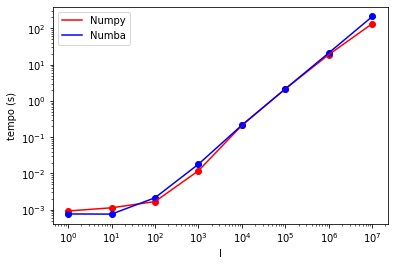

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(median_dict_np_nopython.keys()), list(median_dict_np_nopython.values()), label='Numpy', color='r')
plt.plot(list(median_dict_nb_nopython.keys()), list(median_dict_nb_nopython.values()), label='Numba', color='b')
plt.scatter(list(median_dict_np_nopython.keys()), list(median_dict_np_nopython.values()), color='r')
plt.scatter(list(median_dict_nb_nopython.keys()), list(median_dict_nb_nopython.values()), color='b')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('l')
plt.ylabel('tempo (s)')
plt.legend()
plt.show()

Podemos notar que nos dois *benchmarks* o Numpy é tão rápido ou melhor que o Numba utilizando o compilador JIT.

Apesar do Numpy ser uma biblioteca Python, é importante frisar que uma parte do código fonte da biblioteca (implementa as operações matemáticas computacionalmente extensivas) é escrito em C e o pacote utiliza binários pré-compilados quando instalamos utilizando o [pip](https://pypi.org/project/pip/).

Distribuição de código fonte do código do Numpy no [GitHub](https://github.com/numpy/numpy) em 25/11/2021:

* Python: 63.2%
* C: 34.8%
* Cython: 0.9%
* C++: 0.9%
* Shell: 0.1%
* Fortran: 0.1%

Para mais informações em como utilizar código C e C++ em Python [clique aqui](https://docs.python.org/3/extending/extending.html).

# Exemplificando o funcionamento do modo object mode vs nopython mode

 A seguir definimos uma função que calcula a [distância de jaccard](https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227) para [bigrams](https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/) de um texto. O objetivo é tentar usar o compilador JIT, fornecido pelo Numba, para optmizar a função sabendo que o método **nltk.metrics.distance.jaccard_distance** não é suportado.

In [ ]:
import numba as nb
import numpy as np
from nltk.util import ngrams
from nltk.metrics.distance import jaccard_distance

def python_puro(bigram, key):
    return jaccard_distance( set(ngrams(bigram, 2) ), set(ngrams(key, 2) ) )

@nb.jit()
def numba_object_mode(bigram, key):
    return jaccard_distance( set(ngrams(bigram, 2) ), set(ngrams(key, 2) ) )

@nb.jit(nopython=True)
def numba_nopython_mode(bigram, key):
    return jaccard_distance( set(ngrams(bigram, 2) ), set(ngrams(key, 2) ) )

## Python

In [ ]:
bigram = 'ola mundo'
key = 'ol mundo'

puro(bigram, key)

(727851042, 0.3333333333333333)

## Numba [object mode]

In [ ]:
bigram = 'ola mundo'
key = 'ol mundo'

errado(bigram, key)

<ipython-input-12-f23e79c5fd08>:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "errado" failed type inference due to: Untyped global name 'jaccard_distance': cannot determine Numba type of <class 'function'>

File "<ipython-input-12-f23e79c5fd08>", line 17:
def errado(bigram, key):
    <source elided>
    h = int.from_bytes(hashlib.sha256(bigram.encode()).digest()[:4], 'little')
    j = jaccard_distance( set(ngrams(bigram, 2) ), set(ngrams(key, 2) ) )
    ^

  @nb.jit()
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "errado" was compiled in object mode without forceobj=True.

File "<ipython-input-12-f23e79c5fd08>", line 15:
@nb.jit()
def errado(bigram, key):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detec

(727851042, 0.3333333333333333)

# Numba [nopython mode]

In [ ]:
@nb.jit(nopython=True)
def errado2(bigram, key):
    h = int.from_bytes(hashlib.sha256(bigram.encode()).digest()[:4], 'little')
    j = jaccard_distance( set(ngrams(bigram, 2) ), set(ngrams(key, 2) ) )
    return h,j

In [ ]:
bigram = 'ola mundo'
key = 'ol mundo'

errado2(bigram, key)

TypingError: ignored

Percebemos que, quando o Numba está sendo utilizando no "piloto automático" (object mode), ele analisa o código encontra o erro e o executa sem nenhum topo de interrupção, porém, sem o compilador JIT.

No caso do nopython mode, o Numba interrompe o código no momento que ele tenta compilar uma linha que não é suportado.